# Prediction for one year forward returns for the stock.

The Data: Given dataset has a column for stock name, another column for date. It has a column
which has 1Y forward return for the stocks, which is the y-variable. In the rest of the columns,
there are 69 features (“x-variables”) which are to be used for training and testing the model.
Stock Name is just a descriptive variable and should not be used as x-variable. Dates may or
may not be used to train the model

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/temp-data-torch/_Data1.xls
/kaggle/input/temp-data-torch/_Data1.csv


In [8]:
df= pd.read_csv('../input/temp-data-torch/_Data1.csv',
                 parse_dates=['Date'])
df.head()


,Stock Name,Date,1Y_Forward_Returns,SALES_REV_TURN,PX_TO_TANG_BV_PER_SH,PX_TO_SALES_RATIO,EBITDA,EARN_FOR_COMMON,CF_FREE_CASH_FLOW,RETURN_COM_EQY,...,USGG10YR Index,GDBR10 Index,GJGB10 Index,HIHD03M Index,US0003M Index,M2 Index,ECMSM2 Index,CNMSM2 Index,FDTGATPD Index,SP500 BEST_EPS
0,PPG UN Equity,1999-01-01,0.074026,1789.0,4.7278,1.3727,362.0,162.0,72.0,29.7272,...,4.706419,3.706677,1.925452,6.064937,5.005499,4387.277419,3921210.323,10453.08065,60.394290,53.325484
1,PPG UN Equity,1999-02-01,0.047888,1789.0,4.3423,1.2608,362.0,162.0,72.0,29.7272,...,5.025464,3.854036,2.139071,6.195791,4.997763,4413.450000,3951757.679,10558.13571,60.013000,53.445357
2,PPG UN Equity,1999-03-01,-0.063031,1789.0,4.1850,1.2151,362.0,162.0,72.0,29.7272,...,5.218290,4.023194,1.817548,5.680227,5.009400,4420.300000,3911781.677,10779.92903,60.013000,53.496129
3,PPG UN Equity,1999-04-01,0.047539,1803.0,3.9233,1.1888,347.0,123.0,5.0,27.0910,...,5.176900,3.883400,1.600933,5.361085,4.998500,4446.146667,3930091.067,10846.40000,59.986067,53.990667
4,PPG UN Equity,1999-05-01,-0.160738,1803.0,5.1018,1.5459,347.0,123.0,5.0,27.0910,...,5.534677,4.046613,1.363194,5.267355,5.023246,4469.341935,3951584.581,10924.51935,59.205000,54.171290


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33016 entries, 0 to 33015
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Stock Name                33016 non-null  object        
 1   Date                      33016 non-null  datetime64[ns]
 2   1Y_Forward_Returns        33016 non-null  float64       
 3   SALES_REV_TURN            33016 non-null  float64       
 4   PX_TO_TANG_BV_PER_SH      33016 non-null  float64       
 5   PX_TO_SALES_RATIO         33016 non-null  float64       
 6   EBITDA                    33016 non-null  float64       
 7   EARN_FOR_COMMON           33016 non-null  float64       
 8   CF_FREE_CASH_FLOW         33016 non-null  float64       
 9   RETURN_COM_EQY            33016 non-null  float64       
 10  RETURN_ON_INV_CAPITAL     33016 non-null  float64       
 11  NET_DEBT_TO_SHRHLDR_EQTY  33016 non-null  float64       
 12  PX TO BOOK RATIO  

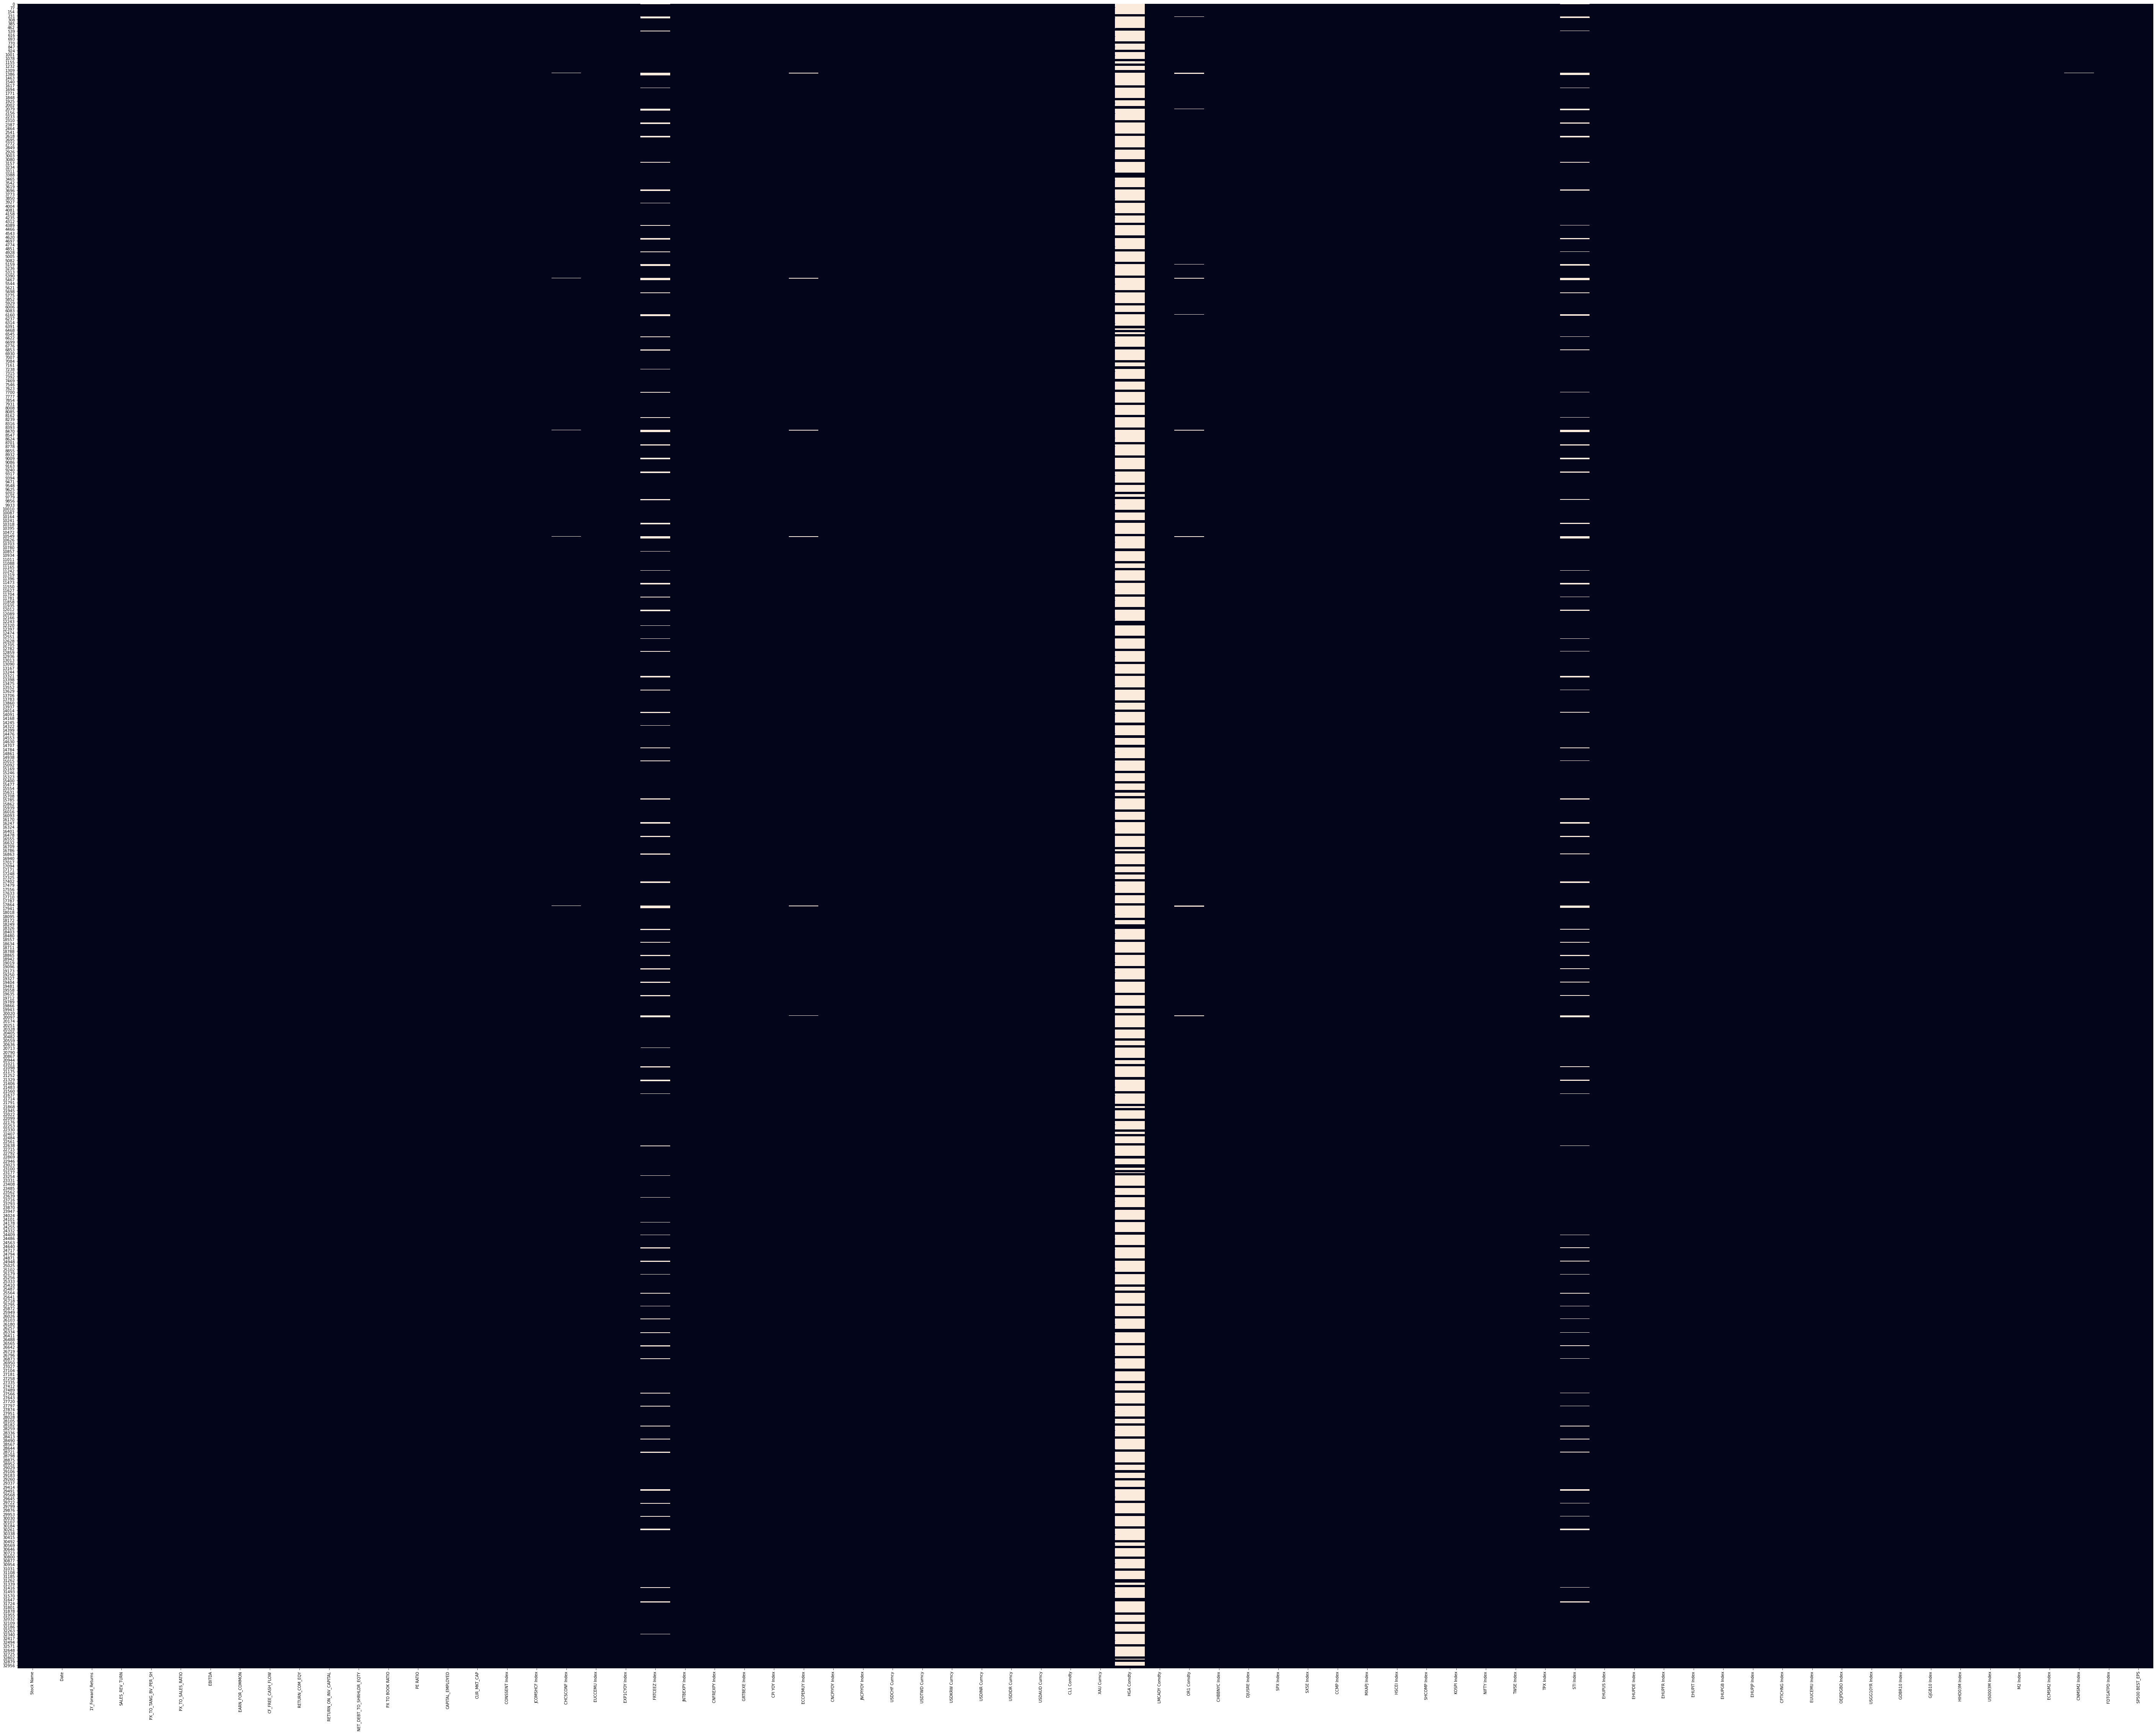

In [10]:
#Visualsing the Data in Heatmap
plt.figure(figsize=(100,80))
sns.heatmap(df.isnull(), cbar=False)

In [38]:
#Dropping the column 'HGA Comdty' as it has high missing data
df= df.drop(['HGA Comdty'],axis=1)
df.head()


,Stock Name,Date,1Y_Forward_Returns,SALES_REV_TURN,PX_TO_TANG_BV_PER_SH,PX_TO_SALES_RATIO,EBITDA,EARN_FOR_COMMON,CF_FREE_CASH_FLOW,RETURN_COM_EQY,...,USGG10YR Index,GDBR10 Index,GJGB10 Index,HIHD03M Index,US0003M Index,M2 Index,ECMSM2 Index,CNMSM2 Index,FDTGATPD Index,SP500 BEST_EPS
0,PPG UN Equity,1999-01-01,0.074026,1789.0,4.7278,1.3727,362.0,162.0,72.0,29.7272,...,4.706419,3.706677,1.925452,6.064937,5.005499,4387.277419,3921210.323,10453.08065,60.394290,53.325484
1,PPG UN Equity,1999-02-01,0.047888,1789.0,4.3423,1.2608,362.0,162.0,72.0,29.7272,...,5.025464,3.854036,2.139071,6.195791,4.997763,4413.450000,3951757.679,10558.13571,60.013000,53.445357
2,PPG UN Equity,1999-03-01,-0.063031,1789.0,4.1850,1.2151,362.0,162.0,72.0,29.7272,...,5.218290,4.023194,1.817548,5.680227,5.009400,4420.300000,3911781.677,10779.92903,60.013000,53.496129
3,PPG UN Equity,1999-04-01,0.047539,1803.0,3.9233,1.1888,347.0,123.0,5.0,27.0910,...,5.176900,3.883400,1.600933,5.361085,4.998500,4446.146667,3930091.067,10846.40000,59.986067,53.990667
4,PPG UN Equity,1999-05-01,-0.160738,1803.0,5.1018,1.5459,347.0,123.0,5.0,27.0910,...,5.534677,4.046613,1.363194,5.267355,5.023246,4469.341935,3951584.581,10924.51935,59.205000,54.171290


In [40]:
#Replacing the missing value by using mean of that column
df['CHCSCONF Index']=df['CHCSCONF Index'].fillna(df['CHCSCONF Index'].mean())
df['FRTCEEZ Index']=df['FRTCEEZ Index'].fillna(df['FRTCEEZ Index'].mean())
df['ECCPEMUY Index']=df['ECCPEMUY Index'].fillna(df['ECCPEMUY Index'].mean())
df['OR1 Comdty']=df['OR1 Comdty'].fillna(df['OR1 Comdty'].mean())
df['STI Index']=df['STI Index'].fillna(df['STI Index'].mean())
df['CNMSM2 Index']=df['CNMSM2 Index'].fillna(df['CNMSM2 Index'].mean())

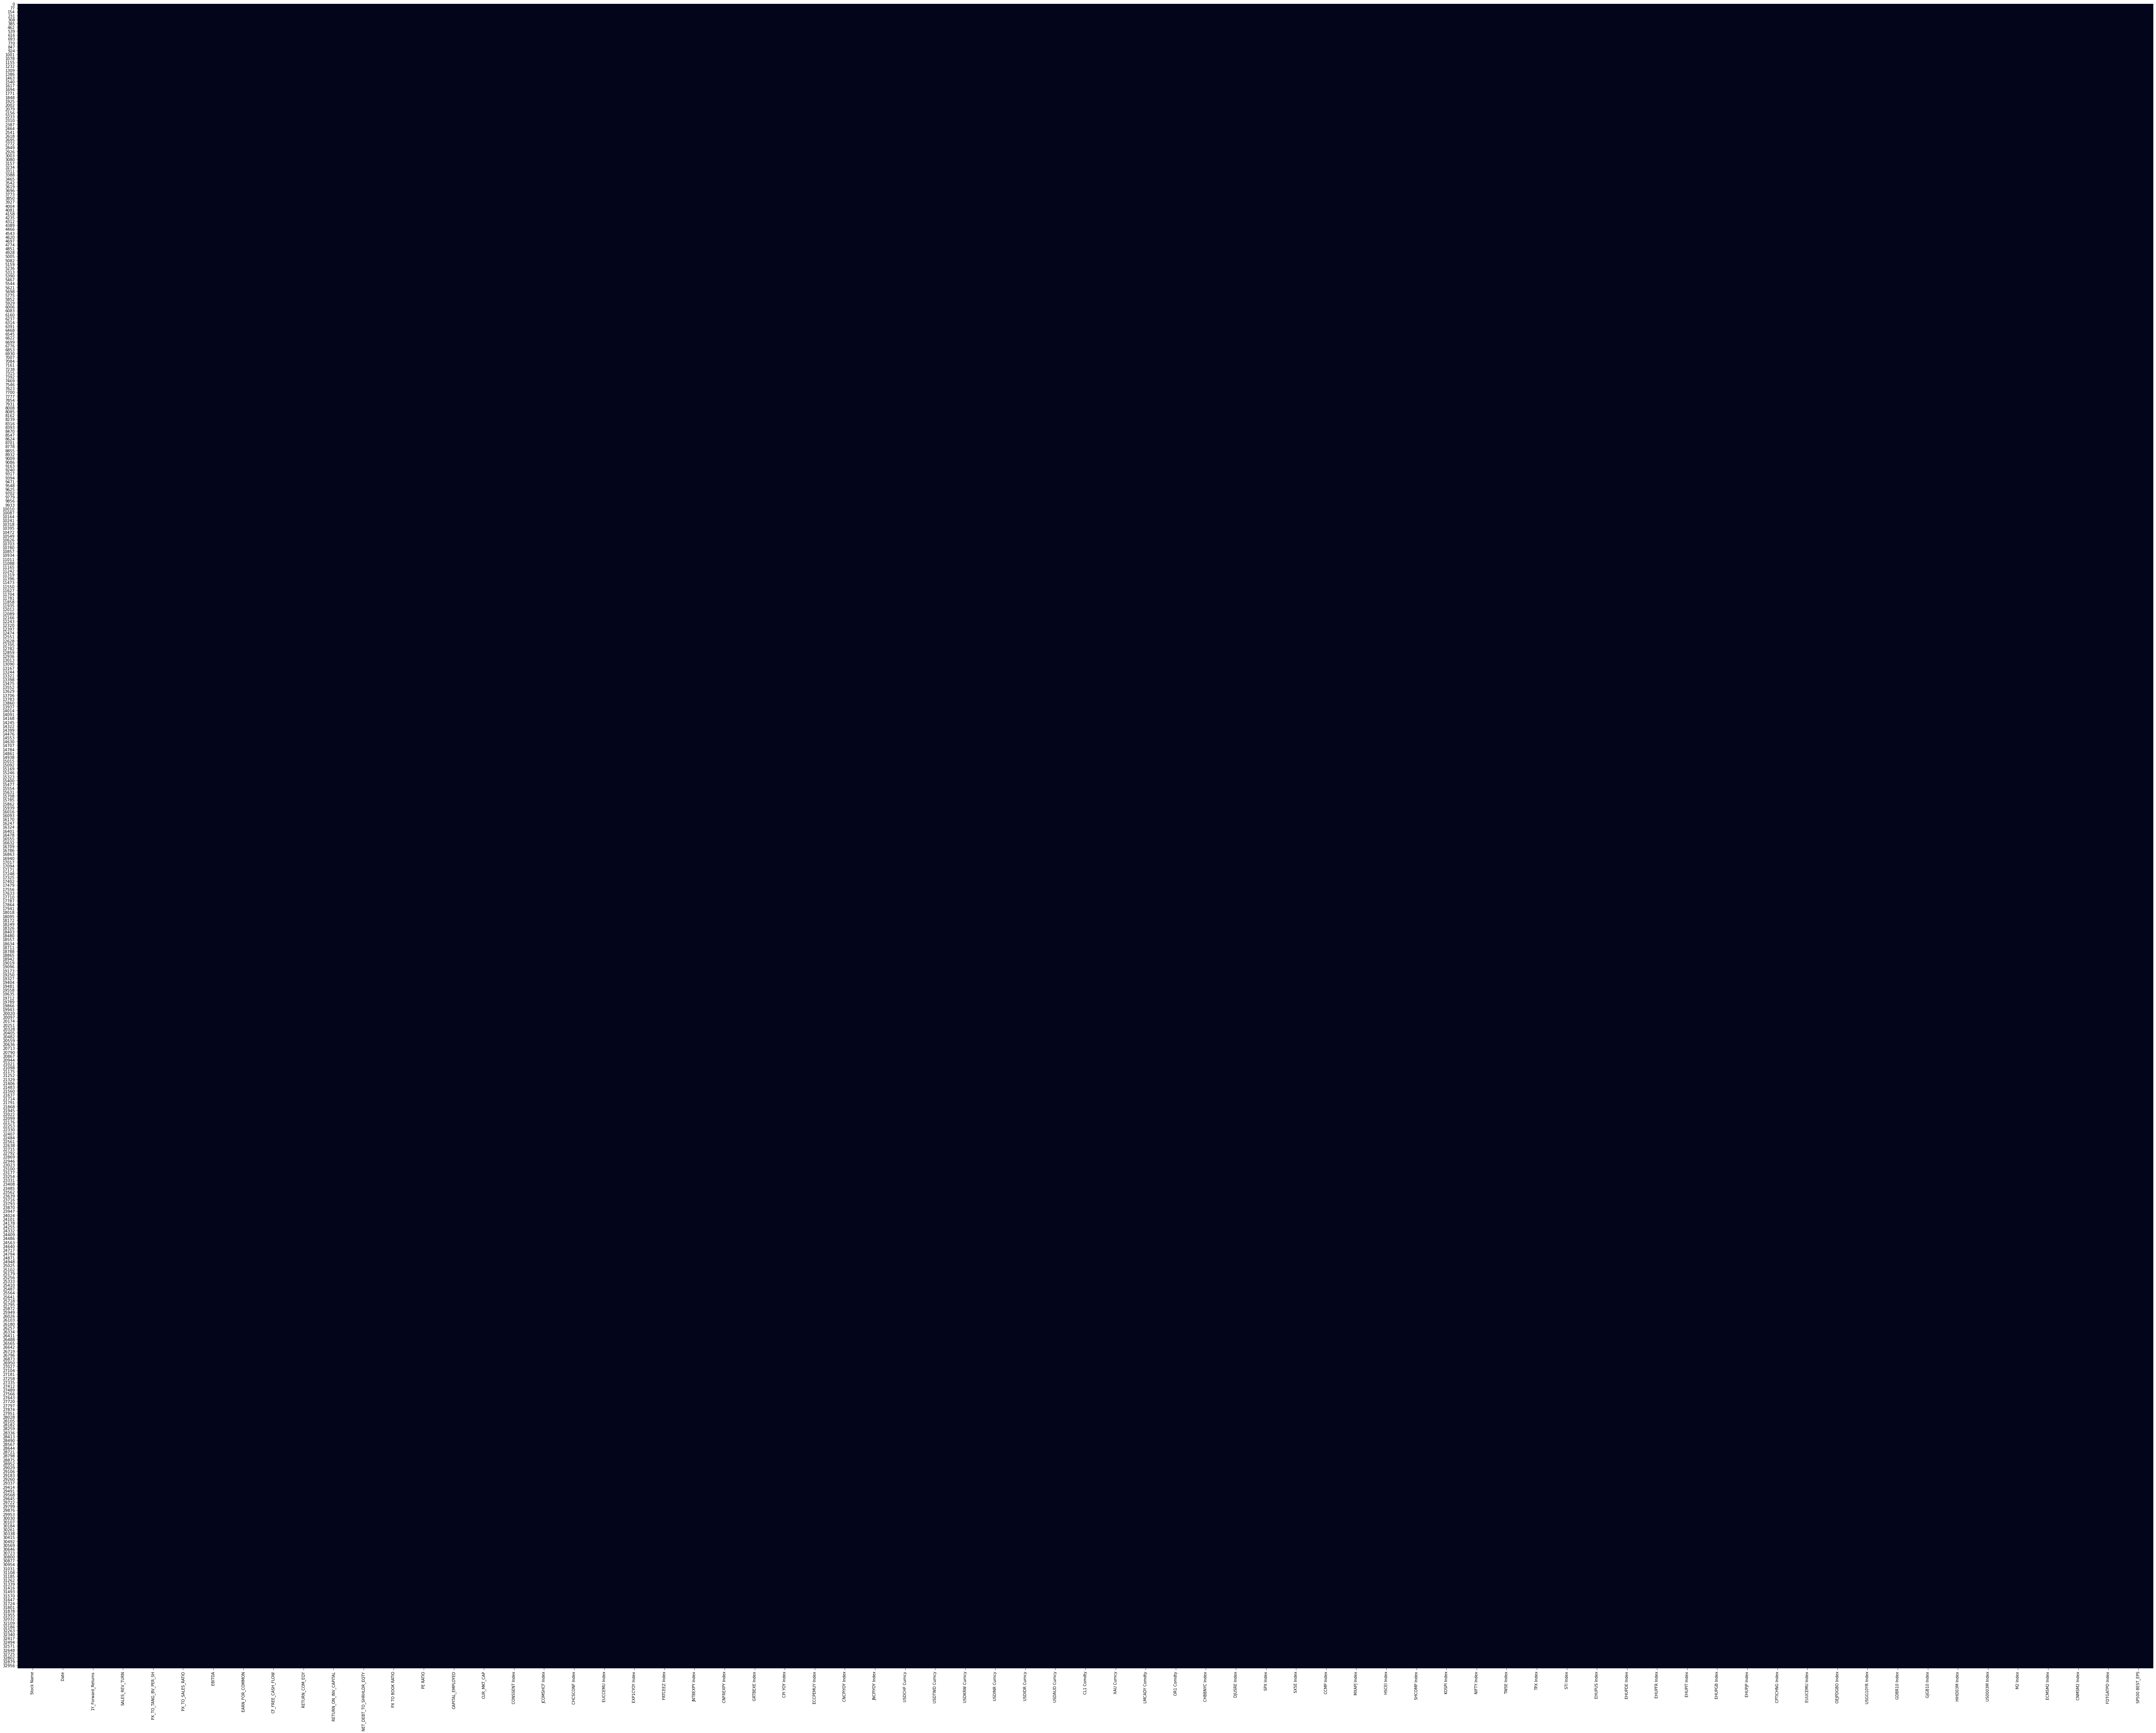

In [13]:
plt.figure(figsize=(100,80))
sns.heatmap(df.isnull(), cbar=False)

In [14]:
#Assigning values to dependent and independent variables.

X= df.iloc[:,3:71]
y= df.iloc[:,2:3]

In [15]:
X.head()

,SALES_REV_TURN,PX_TO_TANG_BV_PER_SH,PX_TO_SALES_RATIO,EBITDA,EARN_FOR_COMMON,CF_FREE_CASH_FLOW,RETURN_COM_EQY,RETURN_ON_INV_CAPITAL,NET_DEBT_TO_SHRHLDR_EQTY,PX TO BOOK RATIO,...,USGG10YR Index,GDBR10 Index,GJGB10 Index,HIHD03M Index,US0003M Index,M2 Index,ECMSM2 Index,CNMSM2 Index,FDTGATPD Index,SP500 BEST_EPS
0,1789.0,4.7278,1.3727,362.0,162.0,72.0,29.7272,16.5454,53.5895,3.5393,...,4.706419,3.706677,1.925452,6.064937,5.005499,4387.277419,3921210.323,10453.08065,60.394290,53.325484
1,1789.0,4.3423,1.2608,362.0,162.0,72.0,29.7272,16.5454,53.5895,3.2507,...,5.025464,3.854036,2.139071,6.195791,4.997763,4413.450000,3951757.679,10558.13571,60.013000,53.445357
2,1789.0,4.1850,1.2151,362.0,162.0,72.0,29.7272,16.5454,53.5895,3.1330,...,5.218290,4.023194,1.817548,5.680227,5.009400,4420.300000,3911781.677,10779.92903,60.013000,53.496129
3,1803.0,3.9233,1.1888,347.0,123.0,5.0,27.0910,15.0945,60.8500,3.1013,...,5.176900,3.883400,1.600933,5.361085,4.998500,4446.146667,3930091.067,10846.40000,59.986067,53.990667
4,1803.0,5.1018,1.5459,347.0,123.0,5.0,27.0910,15.0945,60.8500,4.0329,...,5.534677,4.046613,1.363194,5.267355,5.023246,4469.341935,3951584.581,10924.51935,59.205000,54.171290


In [16]:
y.head()

,1Y_Forward_Returns
0,0.074026
1,0.047888
2,-0.063031
3,0.047539
4,-0.160738


In [18]:
#making the date in the correct format so that our machine learning model can read it.
ks = df.assign(day=df.Date.dt.day,
               month=df.Date.dt.month,
               year=df.Date.dt.year)
ks=ks.drop(['Date'],axis=1)
ks.head()


,Stock Name,1Y_Forward_Returns,SALES_REV_TURN,PX_TO_TANG_BV_PER_SH,PX_TO_SALES_RATIO,EBITDA,EARN_FOR_COMMON,CF_FREE_CASH_FLOW,RETURN_COM_EQY,RETURN_ON_INV_CAPITAL,...,HIHD03M Index,US0003M Index,M2 Index,ECMSM2 Index,CNMSM2 Index,FDTGATPD Index,SP500 BEST_EPS,day,month,year
0,PPG UN Equity,0.074026,1789.0,4.7278,1.3727,362.0,162.0,72.0,29.7272,16.5454,...,6.064937,5.005499,4387.277419,3921210.323,10453.08065,60.394290,53.325484,1,1,1999
1,PPG UN Equity,0.047888,1789.0,4.3423,1.2608,362.0,162.0,72.0,29.7272,16.5454,...,6.195791,4.997763,4413.450000,3951757.679,10558.13571,60.013000,53.445357,1,2,1999
2,PPG UN Equity,-0.063031,1789.0,4.1850,1.2151,362.0,162.0,72.0,29.7272,16.5454,...,5.680227,5.009400,4420.300000,3911781.677,10779.92903,60.013000,53.496129,1,3,1999
3,PPG UN Equity,0.047539,1803.0,3.9233,1.1888,347.0,123.0,5.0,27.0910,15.0945,...,5.361085,4.998500,4446.146667,3930091.067,10846.40000,59.986067,53.990667,1,4,1999
4,PPG UN Equity,-0.160738,1803.0,5.1018,1.5459,347.0,123.0,5.0,27.0910,15.0945,...,5.267355,5.023246,4469.341935,3951584.581,10924.51935,59.205000,54.171290,1,5,1999


Dealing with categorical data

In [19]:
ks['Stock Name'].value_counts()

JNJ UN Equity     298
BDX UN Equity     289
PFE UN Equity     286
LLY UN Equity     286
BMY UN Equity     286
                 ... 
DXCM UW Equity     19
NOW UN Equity       7
EXC UW Equity       4
LIN UN Equity       4
DOW UN Equity       1
Name: Stock Name, Length: 159, dtype: int64

In [20]:

le = LabelEncoder()
ks['Stock Name'] = le.fit_transform(ks['Stock Name'].astype(str))

In [21]:
ks.head()

,Stock Name,1Y_Forward_Returns,SALES_REV_TURN,PX_TO_TANG_BV_PER_SH,PX_TO_SALES_RATIO,EBITDA,EARN_FOR_COMMON,CF_FREE_CASH_FLOW,RETURN_COM_EQY,RETURN_ON_INV_CAPITAL,...,HIHD03M Index,US0003M Index,M2 Index,ECMSM2 Index,CNMSM2 Index,FDTGATPD Index,SP500 BEST_EPS,day,month,year
0,122,0.074026,1789.0,4.7278,1.3727,362.0,162.0,72.0,29.7272,16.5454,...,6.064937,5.005499,4387.277419,3921210.323,10453.08065,60.394290,53.325484,1,1,1999
1,122,0.047888,1789.0,4.3423,1.2608,362.0,162.0,72.0,29.7272,16.5454,...,6.195791,4.997763,4413.450000,3951757.679,10558.13571,60.013000,53.445357,1,2,1999
2,122,-0.063031,1789.0,4.1850,1.2151,362.0,162.0,72.0,29.7272,16.5454,...,5.680227,5.009400,4420.300000,3911781.677,10779.92903,60.013000,53.496129,1,3,1999
3,122,0.047539,1803.0,3.9233,1.1888,347.0,123.0,5.0,27.0910,15.0945,...,5.361085,4.998500,4446.146667,3930091.067,10846.40000,59.986067,53.990667,1,4,1999
4,122,-0.160738,1803.0,5.1018,1.5459,347.0,123.0,5.0,27.0910,15.0945,...,5.267355,5.023246,4469.341935,3951584.581,10924.51935,59.205000,54.171290,1,5,1999


# Dividing into training and test dataset.

In [22]:
#Data having year 2020 has been assigned to test dataset.
df_test=ks[ks['year']==2020]

In [23]:
df_test.shape

(159, 73)

In [24]:
#Data having year less than 2020 has been assigned to training dataset.
df_train= ks[ks['year']<2020]

In [25]:
df_train.shape

(32857, 73)

In [26]:
df_train.columns

Index(['Stock Name', '1Y_Forward_Returns', 'SALES_REV_TURN',
       'PX_TO_TANG_BV_PER_SH', 'PX_TO_SALES_RATIO', 'EBITDA',
       'EARN_FOR_COMMON', 'CF_FREE_CASH_FLOW', 'RETURN_COM_EQY',
       'RETURN_ON_INV_CAPITAL', 'NET_DEBT_TO_SHRHLDR_EQTY', 'PX TO BOOK RATIO',
       'PE RATIO', 'CAPITAL_EMPLOYED', 'CUR_MKT_CAP', 'CONSSENT Index',
       'JCOMSHCF Index', 'CHCSCONF Index', 'EUCCEMU Index', 'EXP1CYOY Index',
       'FRTCEEZ Index', 'JNTBEXPY Index', 'CNFREXPY Index', 'GRTBEXE Index',
       'CPI YOY Index', 'ECCPEMUY Index', 'CNCPIYOY Index', 'JNCPIYOY Index',
       'USDCHF Curncy', 'USDTWD Curncy', 'USDKRW Curncy', 'USDINR Curncy',
       'USDIDR Curncy', 'USDAUD Curncy', 'CL1 Comdty', 'XAU Curncy',
       'LMCADY Comdty', 'OR1 Comdty', 'CHBBNYC Index', 'DJUSRE Index',
       'SPX Index', 'SX5E Index', 'CCMP Index', 'MXAPJ Index', 'HSCEI Index',
       'SHCOMP Index', 'KOSPI Index', 'NIFTY Index', 'TWSE Index', 'TPX Index',
       'STI Index', 'EHUPUS Index', 'EHUPDE Index', 'E

Creating variable features containing all the features and assigning dependent variable is equal to y.

In [27]:
features=['Stock Name','SALES_REV_TURN',
       'PX_TO_TANG_BV_PER_SH', 'PX_TO_SALES_RATIO', 'EBITDA',
       'EARN_FOR_COMMON', 'CF_FREE_CASH_FLOW', 'RETURN_COM_EQY',
       'RETURN_ON_INV_CAPITAL', 'NET_DEBT_TO_SHRHLDR_EQTY', 'PX TO BOOK RATIO',
       'PE RATIO', 'CAPITAL_EMPLOYED', 'CUR_MKT_CAP', 'CONSSENT Index',
       'JCOMSHCF Index', 'CHCSCONF Index', 'EUCCEMU Index', 'EXP1CYOY Index',
       'FRTCEEZ Index', 'JNTBEXPY Index', 'CNFREXPY Index', 'GRTBEXE Index',
       'CPI YOY Index', 'ECCPEMUY Index', 'CNCPIYOY Index', 'JNCPIYOY Index',
       'USDCHF Curncy', 'USDTWD Curncy', 'USDKRW Curncy', 'USDINR Curncy',
       'USDIDR Curncy', 'USDAUD Curncy', 'CL1 Comdty', 'XAU Curncy',
       'LMCADY Comdty', 'OR1 Comdty', 'CHBBNYC Index', 'DJUSRE Index',
       'SPX Index', 'SX5E Index', 'CCMP Index', 'MXAPJ Index', 'HSCEI Index',
       'SHCOMP Index', 'KOSPI Index', 'NIFTY Index', 'TWSE Index', 'TPX Index',
       'STI Index', 'EHUPUS Index', 'EHUPDE Index', 'EHUPFR Index',
       'EHUPIT Index', 'EHUPGB Index', 'EHUPJP Index', 'CPTICHNG Index',
       'EUUCEMU Index', 'OEJPDGBO Index', 'USGG10YR Index', 'GDBR10 Index',
       'GJGB10 Index', 'HIHD03M Index', 'US0003M Index', 'M2 Index',
       'ECMSM2 Index', 'CNMSM2 Index', 'FDTGATPD Index', 'SP500 BEST_EPS',
       'day', 'month', 'year']
y=df_train['1Y_Forward_Returns']

In [28]:
X= df_train[features]

# Using Linear Regression

In [29]:

regressor= linear_model.LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [30]:
X_val=df_test[features]
y_val=df_test['1Y_Forward_Returns']

In [33]:
prediction=regressor.predict(X_val)
rmse=mean_squared_error(prediction, y_val , squared=False)
print(rmse)
print(prediction)

0.07350297535012396
[ 2.70938912e-02 -3.56023912e-01 -3.40350778e-01 -2.39073241e-01
 -2.89113208e-01 -1.66574995e-01 -6.31443319e-02 -6.88106538e-02
 -2.16784845e-01 -8.39833152e-02 -3.71056139e-02 -5.53994027e-02
 -3.75057950e-02 -8.23225796e-03 -1.54178390e-01  4.25798420e-03
 -1.67281487e-01  4.42117456e-03 -7.72508114e-02  9.67778131e-03
 -1.65563996e-02 -1.55003167e-02 -3.27130743e-02 -2.09442041e-01
 -2.66014226e-02 -9.77061835e-02  3.81312683e-02  1.11732199e-02
 -3.78511219e-02 -4.73410748e-02 -2.48926536e-02  1.43458553e-03
  1.43620895e-02 -2.50651013e-01 -4.90596852e-03 -9.32224783e-03
 -1.23396298e-02 -1.83148833e-01 -1.64240023e-02 -6.16687447e-02
  4.73920239e-03 -1.47413933e-03 -4.45038068e-02 -1.71824745e-02
  5.27353842e-03 -6.14966993e-02 -4.10689178e-02 -2.43599514e-04
  1.66371266e-04 -7.33027773e-03 -1.39566673e-01 -2.32843611e-02
 -1.83458160e-01 -1.76487058e-02 -3.06154179e-02  3.72004074e-02
 -1.18264078e-02  1.22082002e-02 -3.60683628e-03  5.20143115e-03
 -5.2

Linear Regression gave mean squared error = 0.07350297535012396

# Using Random Forest

In [35]:

randomf=ensemble.RandomForestRegressor(n_estimators=10,max_depth=4,n_jobs=4,random_state=1,criterion='mse')
randomf.fit(X,y)

RandomForestRegressor(max_depth=4, n_estimators=10, n_jobs=4, random_state=1)

In [36]:
prediction=randomf.predict(X_val)
rmse=mean_squared_error(prediction, y_val , squared=False)
print(rmse)
print(prediction)

0.060167608482770245
[0.06995008 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523
 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523
 0.05039523 0.06995008 0.05039523 0.06995008 0.05039523 0.05039523
 0.05039523 0.06995008 0.05039523 0.05039523 0.05039523 0.05039523
 0.05039523 0.05039523 0.06995008 0.05039523 0.05039523 0.05039523
 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523
 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523
 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523
 0.05039523 0.05039523 0.05039523 0.05039523 0.06995008 0.05039523
 0.05039523 0.06995008 0.05039523 0.06995008 0.05039523 0.06995008
 0.05039523 0.05039523 0.06995008 0.06995008 0.05039523 0.05039523
 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523 0.05039523
 0.05039523 0.05039523 0.06995008 0.06995008 0.06995008 0.05039523
 0.05039523 0.06995008 0.05039523 0.05039523 0.06995008 0.06995008
 0.05039523 0.05039523 0.06995008 0.05039

Random forest gave mean squared error = 0.060167608482770245

Since the random forest algorithm is giving lower error value so this model is better.